### Visualizing the Target Variable 
Determine the overall balance of the samples, between normal, deleted and amplifed gene regions. 
The following include visualizations like bar plots to assess the distribution of the target variable. They show display the level of balance and skewness of data or has certain ranges that are under- or over-represented.

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob as glob
import numpy as np

In [150]:
df_map = pd.read_csv('https://raw.githubusercontent.com/LaraLim/cnv-supervised-learning/refs/heads/main/sample_mapping.csv?token=GHSAT0AAAAAACXNJQCFXPY5VH5FEFSBG5NCZY67QXA')


combined_df = pd.DataFrame()
combined_df['CaseID'] = ''

#first sample 
filename = df_map['Filename'][0]

#get the shape of the dataframe
url = f'https://raw.githubusercontent.com/LaraLim/cnv-supervised-learning/refs/heads/main/gene_level_cnv/{filename}'
df = pd.read_csv(url, sep='\t')
numRows = df.shape[0]

#dictionary of dataframes for each id 
dfs = {}

print(f'{filename} has {df.shape[0]} rows')


for filename in df_map['Filename']:

    #append new column for the case id
    case_id = df_map[df_map['Filename'] == filename]['CaseID'].values[0]


    url = f'https://raw.githubusercontent.com/LaraLim/cnv-supervised-learning/refs/heads/main/gene_level_cnv/{filename}'
    df = pd.read_csv(url, sep='\t')

    #check if the number of rows is the same
    if df.shape[0] != numRows: 
        print("The number of rows is not the same between all files")
    
    df['CaseID'] = case_id

    df['status'] = 'normal'
    df.loc[df['copy_number'] > 2, 'status'] = 'amplified'
    df.loc[df['copy_number'] < 2, 'status'] = 'deleted'
    

    #add the dataframe to the dictionary
    dfs[case_id] = df
    
    combined_df = pd.concat([combined_df, df], ignore_index=True)

   
display(combined_df.head())

#display the bottom of the dataframe
display(combined_df.tail())

ee5e869c-e15f-4899-9e12-377920609b42.wgs.ASCAT.gene_level.copy_number_variation.tsv has 60623 rows


,CaseID,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number,status
0,C3L-00359-01,ENSG00000223972.5,DDX11L1,chr1,11869.0,14409.0,4.0,4.0,4.0,amplified
1,C3L-00359-01,ENSG00000227232.5,WASH7P,chr1,14404.0,29570.0,4.0,4.0,4.0,amplified
2,C3L-00359-01,ENSG00000278267.1,MIR6859-1,chr1,17369.0,17436.0,4.0,4.0,4.0,amplified
3,C3L-00359-01,ENSG00000243485.5,MIR1302-2HG,chr1,29554.0,31109.0,4.0,4.0,4.0,amplified
4,C3L-00359-01,ENSG00000284332.1,MIR1302-2,chr1,30366.0,30503.0,4.0,4.0,4.0,amplified


,CaseID,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number,status
2303669,C3N-03188-02,ENSG00000124334.17_PAR_Y,IL9R,chrY,57184101.0,57197337.0,NaN,NaN,NaN,normal
2303670,C3N-03188-02,ENSG00000270726.6_PAR_Y,AJ271736.1,chrY,57190738.0,57208756.0,NaN,NaN,NaN,normal
2303671,C3N-03188-02,ENSG00000185203.12_PAR_Y,WASIR1,chrY,57201143.0,57203357.0,NaN,NaN,NaN,normal
2303672,C3N-03188-02,ENSG00000182484.15_PAR_Y,WASH6P,chrY,57207346.0,57212230.0,NaN,NaN,NaN,normal
2303673,C3N-03188-02,ENSG00000227159.8_PAR_Y,DDX11L16,chrY,57212184.0,57214397.0,NaN,NaN,NaN,normal


In [151]:
# add status column for amplified, deleted, or normal
combined_df['status'] = 'normal'
combined_df.loc[combined_df['copy_number'] > 2, 'status'] = 'amplified'
combined_df.loc[combined_df['copy_number'] < 2, 'status'] = 'deleted'

In [152]:
display(combined_df.head())

,CaseID,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number,status
0,C3L-00359-01,ENSG00000223972.5,DDX11L1,chr1,11869.0,14409.0,4.0,4.0,4.0,amplified
1,C3L-00359-01,ENSG00000227232.5,WASH7P,chr1,14404.0,29570.0,4.0,4.0,4.0,amplified
2,C3L-00359-01,ENSG00000278267.1,MIR6859-1,chr1,17369.0,17436.0,4.0,4.0,4.0,amplified
3,C3L-00359-01,ENSG00000243485.5,MIR1302-2HG,chr1,29554.0,31109.0,4.0,4.0,4.0,amplified
4,C3L-00359-01,ENSG00000284332.1,MIR1302-2,chr1,30366.0,30503.0,4.0,4.0,4.0,amplified


### Distribution of Amplified, Normal, and Deleted Accross all of the Cases

Although the objective is predicting the copy number variations for Below you will find the distribution of the three 

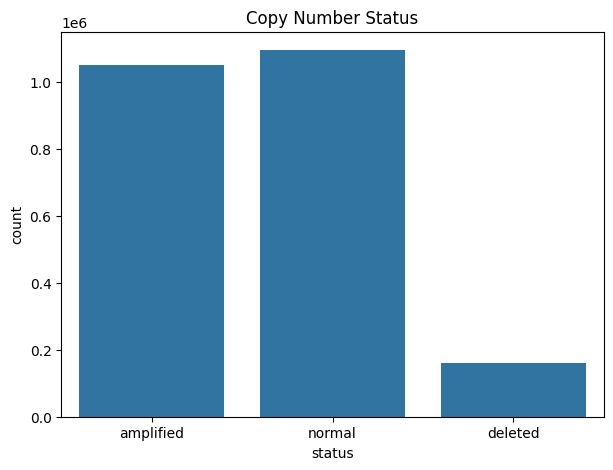

In [153]:
# plot the count of each status
plt.figure(figsize=(7, 5))
sns.countplot(data=combined_df, x='status')
plt.title('Copy Number Status')
plt.show()


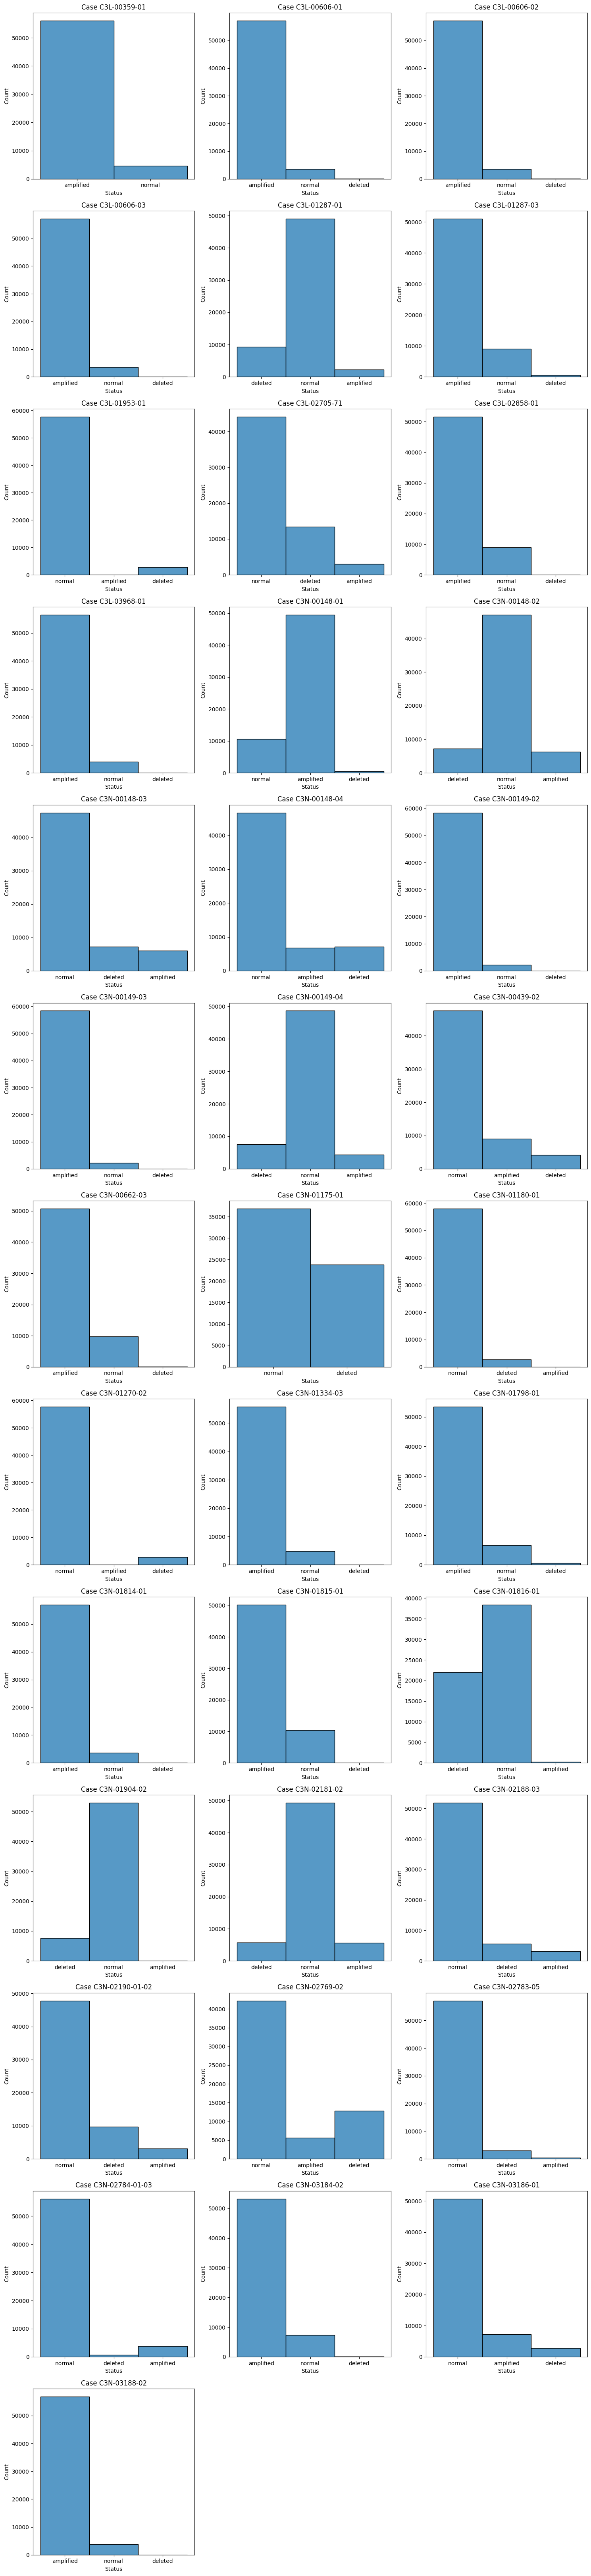

In [154]:
# Determine the number of cases
import math
num_cases = len(dfs)

# Determine the grid size
num_cols = 3
num_rows = math.ceil(num_cases / num_cols)

# Create subplots
plt.figure(figsize=(15, 5 * num_rows))
for i, (case_id, df) in enumerate(dfs.items()):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df, x='status')
    plt.title(f'Case {case_id}')
    plt.xlabel('Status')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

With most CNV values around the "normal" and "amplified" ranges, the model might skew its predictions toward those ranges, making it less accurate for "deleted" CNV values. This can cause higher errors and a lower performance in predicting CNV values less than two. In other words, the model might struggle to capture unique patterns associated with low CNV values due to fewer examples.

### Distribution of Copy Number Variations
Below you will find box plots of the distributions copy number variations of all the samples combined.

Note the copy number variations of all of the samples are composed of the following unique values. We can see that it is also comprised of null values, which will be handled using data imputations for future processing.

#### Unique CNVs

In [155]:
copy_numbers = combined_df['copy_number'].unique()
print("unique copy numbers = " + str(copy_numbers))
print("total number of unique copy numbers = " + str(len(copy_numbers)))

unique copy numbers = [  4.  nan   5.  14.   7.   9.   3.  13.   8.   2.  12.  10.  11.   6.
   0.   1.  34.  45.  33.  26. 380. 362. 194. 353.  23.  42.  22.  15.
  32.  56. 357.  62. 329.  48. 340. 190.  79. 113. 106. 105.  94.  20.
  61.  17.  35. 165. 168. 170. 281. 134.  50.  59.  16.  24.  40.  41.
  38.  37. 101.  18.  21. 304.]
total number of unique copy numbers = 62


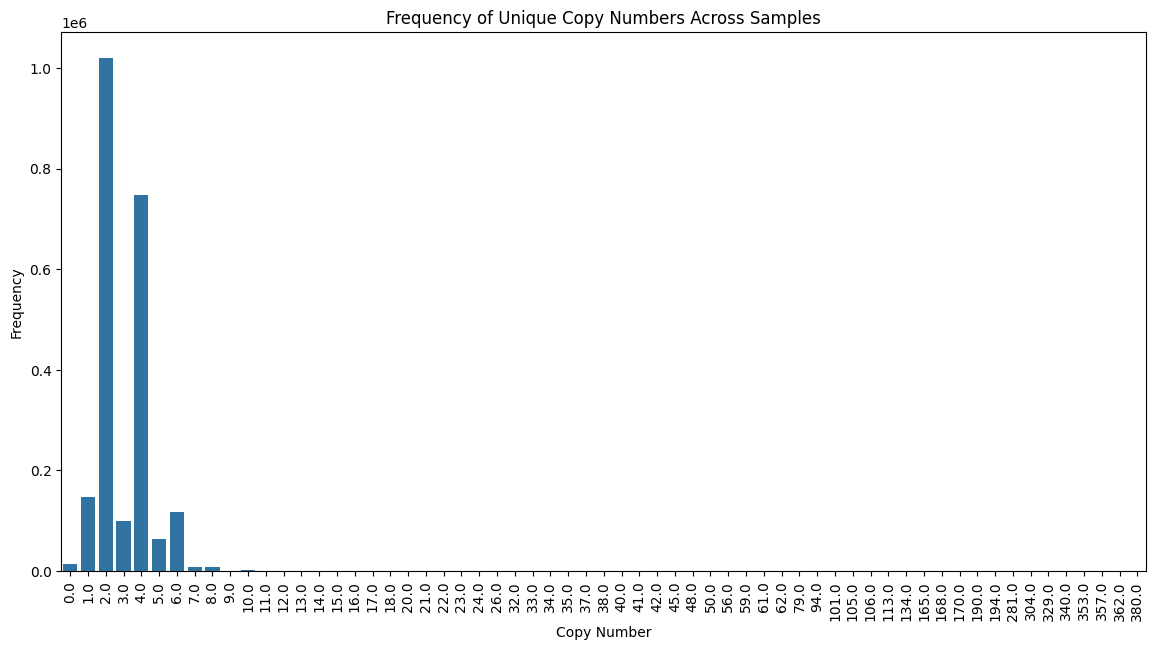

In [156]:
# Drop NaN values from the 'copy_number' column
copy_numbers = combined_df['copy_number'].dropna()

# Count the frequencies of each unique copy number
copy_number_counts = copy_numbers.value_counts().sort_index()

# Plot the counts for each unique copy number
plt.figure(figsize=(14, 7))
sns.barplot(x=copy_number_counts.index, y=copy_number_counts.values)
plt.xlabel('Copy Number')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Copy Numbers Across Samples')
plt.xticks(rotation=90)
plt.show()


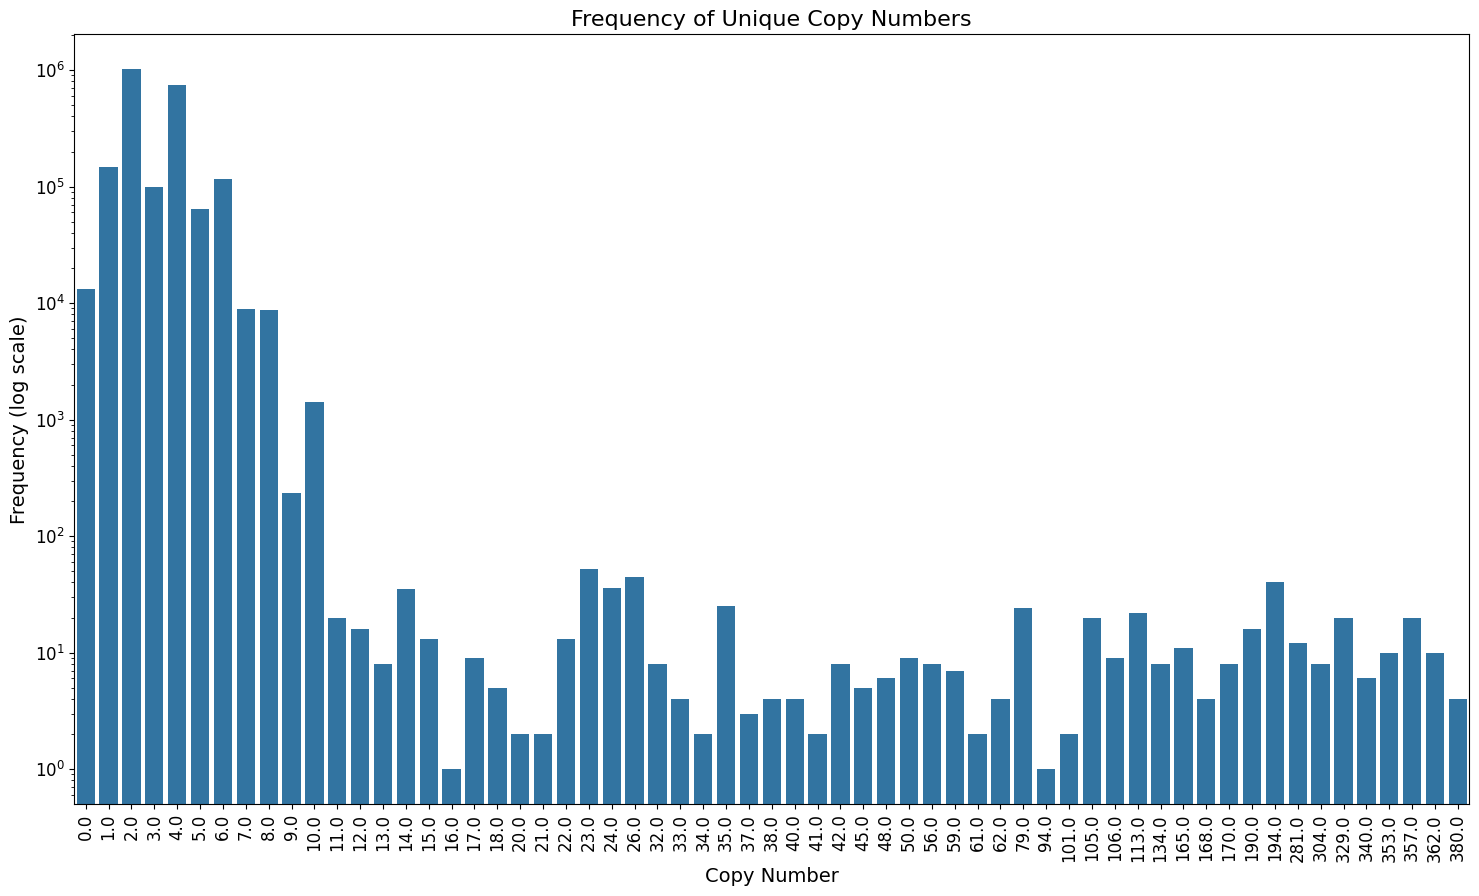

In [138]:
# Plot the counts for each unique copy number
plt.figure(figsize=(18, 10))  # Increase the figure size
sns.barplot(x=copy_number_counts.index, y=copy_number_counts.values)

# using a y-axis log scale to better visualize the differences in frequency between copy numbers because they vary widely
plt.yscale('log')
plt.xlabel('Copy Number', fontsize=14)
plt.ylabel('Frequency (log scale)', fontsize=14)
plt.title('Log Scaled Frequency of Unique Copy Numbers Across Samples', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From this we can see the that the model may struggle to predict CNV values in the high range due to the limited number of examples for those values, leading to larger errors on those predictions. The data is skewed as most of the values are concentrated around lower copy numbers (from 0 to around 10), with relatively few samples in the higher ranges (beyond 20). This pattern indicates a right skew or positive skew, where lower CNV values are much more frequent than higher ones.

Therefore, the model may prioritize accuracy on lower CNV values (since they dominate the data) and may struggle to generalize well for higher CNV values due to their limited representation. Additionally, evaluation metrics like mean squared error (MSE) or mean absolute error (MAE) could be biased towards minimizing errors for lower CNV values, possibly overlooking errors in the higher ranges.

## Plots for Each Sample

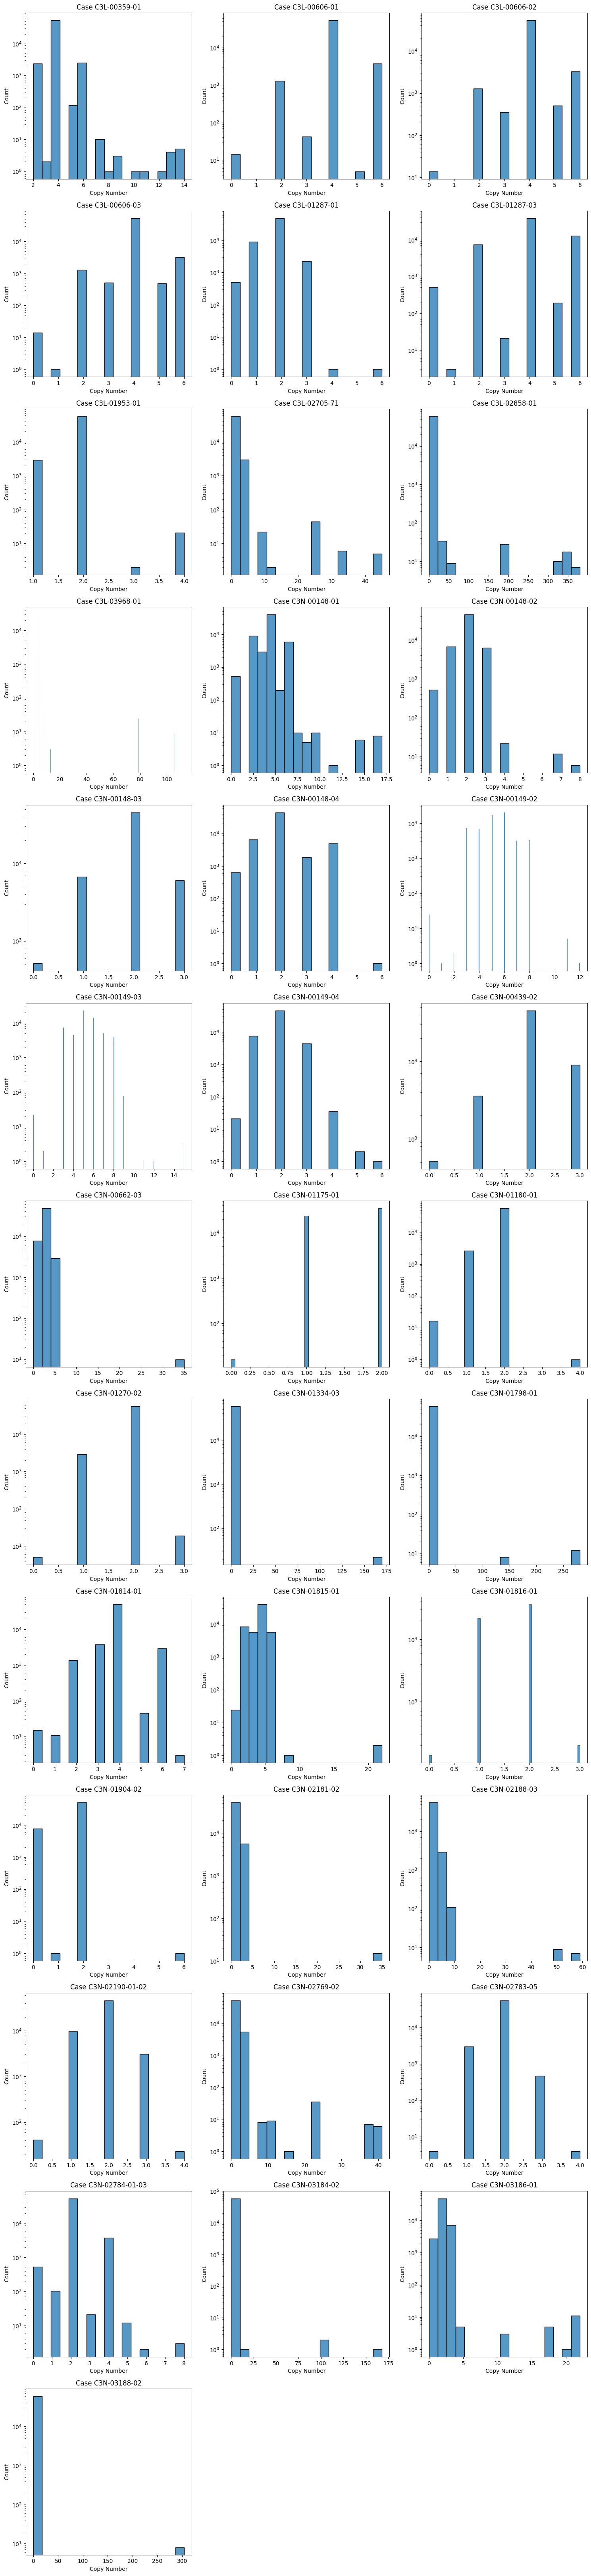

In [157]:
plt.figure(figsize=(15, 5 * num_rows))
for i, (case_id, df) in enumerate(dfs.items()):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.yscale('log')
    sns.histplot(data=df, x='copy_number')
    plt.title(f'Case {case_id}')
    plt.xlabel('Copy Number')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()
    